Ejercicio 1 - Machine Learning
Mercado Pago en días recientes implementó una campaña de marketing
relacionada con un nuevo producto de Mercado Crédito. Esta campaña está basada
en el marketing directo (llamadas telefónicas) y pretende entender el
comportamiento de los clientes entrevistados a fin de construir modelos que
permitan predecir el comportamiento de clientes no conocidos. Para ello MELI ha
recolectado un conjunto de datos que pretende ser utilizado para la construcción de
modelos de Machine Learning. Una vez recolectados y analizados estos datos se
requiere implementar una Proof of Concept para un modelo que utilice la
información suministrada para efectuar predicciones sobre el comportamiento de
nuevos clientes.
Tu misión si decides aceptarla es que llegues a validar si es posible construir un
modelo que cumpla con este requerimiento, atravesando todas las fases clásicas de
un problema de machine learning (comprender el problema, analizar los datos,
entrenar y evaluar el modelo, qué se está teniendo en cuenta a la hora de realizar
predicciones, análisis de errores, etc.) utilizando buenas prácticas de programación
y explicando cada paso.

# Importação

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

In [21]:
df_bruto = pd.read_csv('../data/MeliDataset.csv', sep = ';')

In [22]:
df_bruto.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Descrição dos Dados

In [24]:
df_bruto.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Dados do cliente meli:


1 - idade (numérica)

2 - emprego: tipo de emprego (categoria: 'administrativo', 'operário', 'empreendedor', 'empregada doméstica',
'gestão', 'aposentado', 'autônomo', 'serviços', 'estudante', 'técnico', 'desempregado', 'desconhecido')

3 - civil: estado civil (categoria: 'divorciado', 'casado', 'solteiro', 'desconhecido'; observação:
'divorciado' significa divorciado ou viúvo)

4 - escolaridade (categoria: 'básico.4 anos', 'básico.6 anos', 'básico.9 anos', 'ensino médio', 'analfabeto',
'curso profissionalizante', 'diploma universitário', 'desconhecido')

5 - inadimplência: tem crédito em inadimplência? (categórico: 'não', 'sim', 'desconhecido')

6 - habitação: possui financiamento imobiliário? (categórico: 'não', 'sim', 'desconhecido')

7 - empréstimo: possui empréstimo pessoal? (categórico: 'não', 'sim', 'desconhecido')
Dados do último contato da campanha # meli:

8 - contato: tipo de comunicação do contato (categórico: 'celular', 'telefone')

9 - mês: mês do último contato do ano (categórico: 'jan', 'fev', 'mar', ..., 'nov', 'dez')

10 - dia_da_semana: dia da semana do último contato (categórico:
'seg', 'ter', 'qua', 'qui', 'sex')

11 - duração: duração do último contato, em segundos (numérico). Observação importante: este
atributo afeta bastante a meta de saída (por exemplo, se duração = 0, então y = 'não'). No entanto, a duração não é conhecida antes da chamada ser realizada. Além disso, após o término da chamada, y é obviamente conhecido. Portanto, essa entrada deve ser incluída apenas para fins de benchmark e deve ser descartada se a intenção for ter um modelo preditivo realista. # outros atributos:

12 - campanha: número de contatos realizados durante esta campanha e para este
cliente (numérico, inclui o último contato)

13 - pdays: número de dias decorridos desde o último contato do cliente em uma
campanha anterior (numérico; 999 significa que o cliente não foi contatado anteriormente)

14 - anterior: número de contatos realizados antes desta campanha e para este cliente
(numérico)

15 - poutcome: resultado da campanha de marketing anterior (categórico:
'fracasso','inexistente','sucesso')

atributos de contexto social e econômico

16 - emp.var.rate: taxa de variação do emprego - indicador trimestral (numérico)

17 - cons.price.idx: índice de preços ao consumidor - indicador mensal (numérico)

18 - cons.conf.idx: índice de confiança do consumidor - indicador mensal (numérico)

19 - euribor3m: taxa euribor trimestral - indicador diário (numérico)

20 - nr.employed: número de funcionários - trimestral Indicador (numérico)

Variável de saída (meta desejada):
21 - s - o cliente aderiu a um "Mercado Crédito Ya"? (binário: 'sim', 'não')

In [25]:
print("Número de Linhas: ", df_bruto.shape[0])
print("Número de Colunas: ", df_bruto.shape[1])


Número de Linhas:  41188
Número de Colunas:  21


In [26]:
df_bruto['y'].value_counts()/len(df_bruto)

y
no     0.887346
yes    0.112654
Name: count, dtype: float64

Situação: dados desbalanceados com base na classe alvo.

Ação: faremos testes na construção do modelo com dados desbalanceados observando a métrica auprc e testaremos também com oversampling da classe minoritária.

In [27]:
df_bruto.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [28]:
df_bruto.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [29]:
df_bruto.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [30]:
num_attributes = df_bruto.select_dtypes(include=['int64', 'float64'])
num_attributes.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [31]:
categorical_attributes = df_bruto.select_dtypes(include=['object'])
categorical_attributes.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [32]:
num_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


Situação: A variável "durantion" só pode ser adquirida após a ligação ser feita, logo ela não pode ser usada na construção de um modelo para prever se o cliente vai contratar o crédito antes da ligação ser feita.

Ação: Vamos remover a variável "duration".

In [33]:
categorical_attributes.apply( lambda x: x.unique().shape[0])

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

Situação: Variável alvo desbalanceada.

Ação:  Antes de seguirmos, vamos fazer uma divisão estratificada(10%) dos dados para fazer a validação e controle de overffiting do modelo e evitar vazamento de dados.

In [34]:
from sklearn.model_selection import train_test_split

X = df_bruto.drop(columns=['y'])
y = df_bruto['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    stratify=y,  # Garante proporções iguais entre as classes
    random_state=42  # Para reprodutibilidade
)

train_df = X_train.copy()
train_df['y'] = y_train

test_df = X_test.copy()
test_df['y'] = y_test

print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))

Train class distribution:
 y
no     0.887345
yes    0.112655
Name: proportion, dtype: float64
Test class distribution:
 y
no     0.887351
yes    0.112649
Name: proportion, dtype: float64


In [35]:
train_df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
8061,52,technician,divorced,professional.course,unknown,yes,no,telephone,jun,mon,...,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
25300,36,management,married,university.degree,no,yes,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
17667,53,blue-collar,married,high.school,no,yes,yes,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
37400,45,blue-collar,single,basic.9y,no,yes,no,cellular,aug,wed,...,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no
4629,60,housemaid,married,high.school,unknown,yes,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
29273,57,retired,married,basic.6y,unknown,no,no,cellular,apr,fri,...,2,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no
31109,48,technician,single,professional.course,no,yes,no,cellular,may,wed,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
8310,45,blue-collar,married,basic.4y,unknown,yes,yes,telephone,jun,tue,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
4947,30,blue-collar,single,high.school,unknown,yes,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
32503,34,blue-collar,married,basic.4y,unknown,yes,no,cellular,may,fri,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


# Análise Exploratório dos Dados

## Distribuição da Variável Alvo

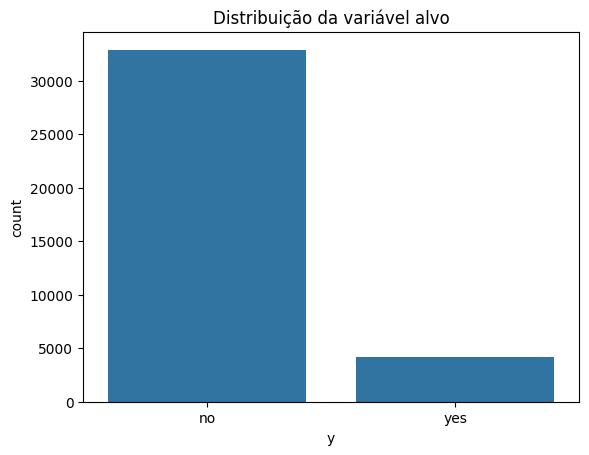

y
no     0.887345
yes    0.112655
Name: proportion, dtype: float64


In [36]:
sns.countplot(x='y', data=train_df)
plt.title('Distribuição da variável alvo')
plt.show()
print(train_df['y'].value_counts(normalize=True))
# Filtragem de Variáveis
# Engenharia de Atributos

## Análise Univariada 

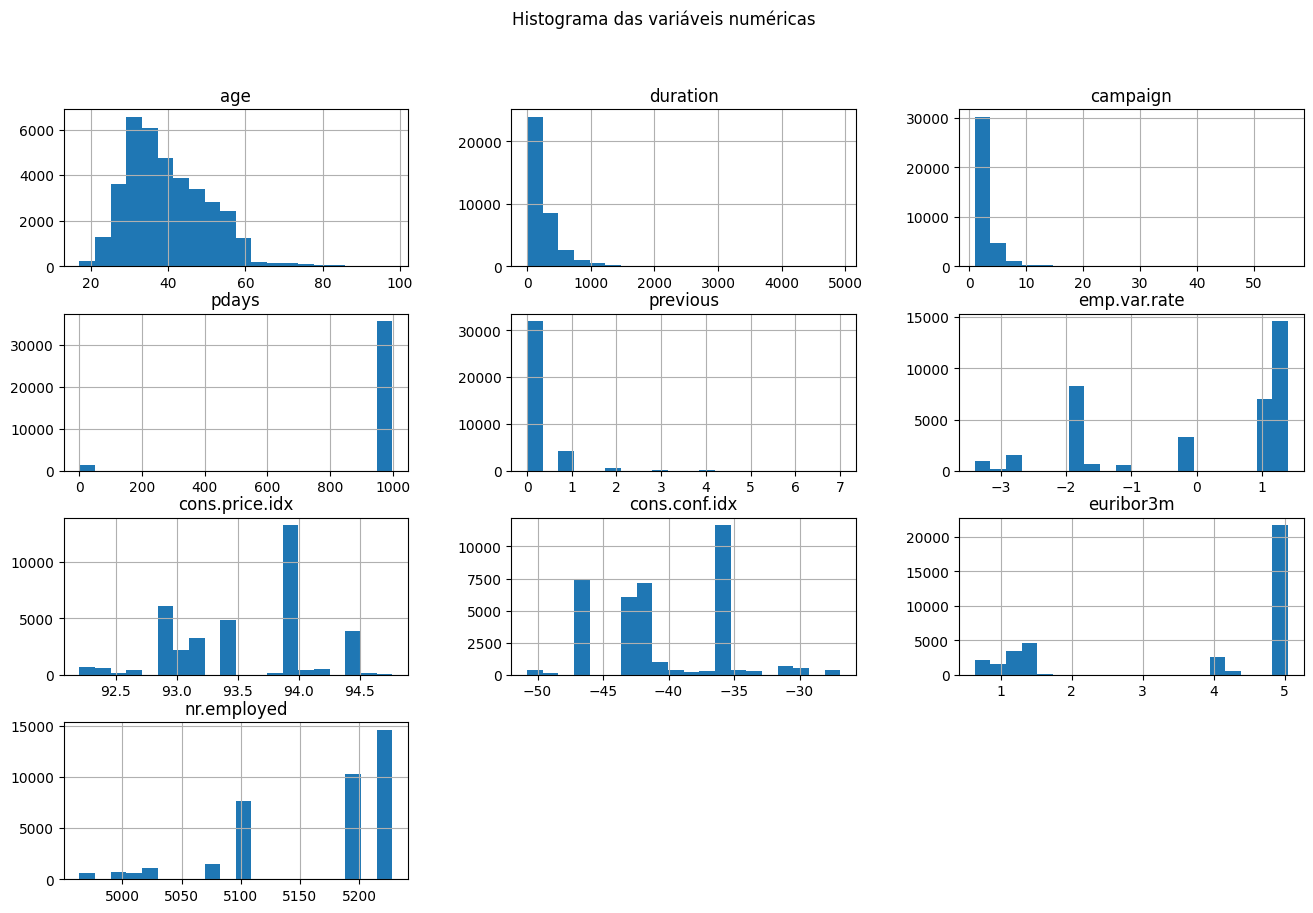

In [37]:
#Análise univariada das variáveis numéricas
train_df[num_attributes.columns].hist(bins=20, figsize=(16, 10))
plt.suptitle('Histograma das variáveis numéricas')
plt.show()

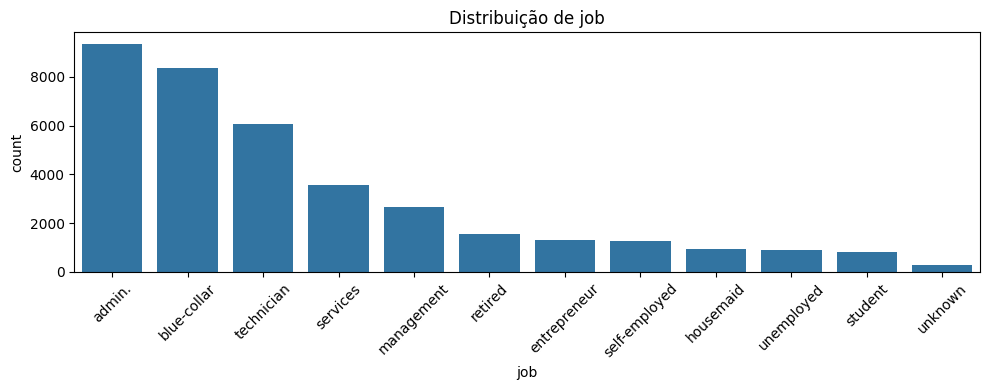

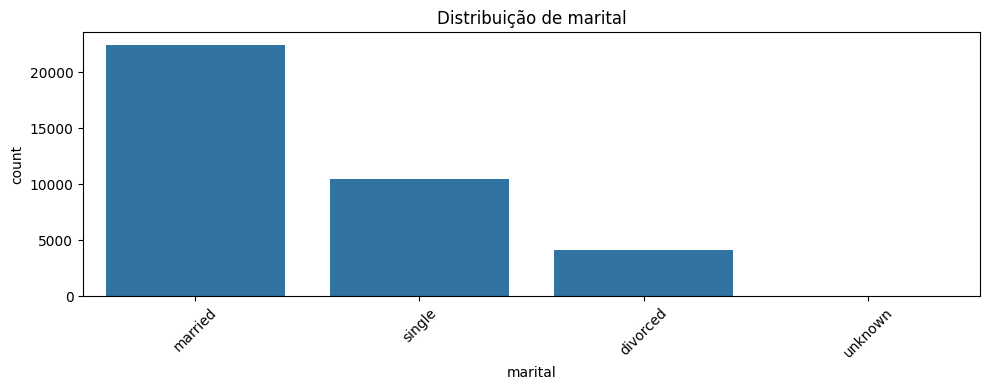

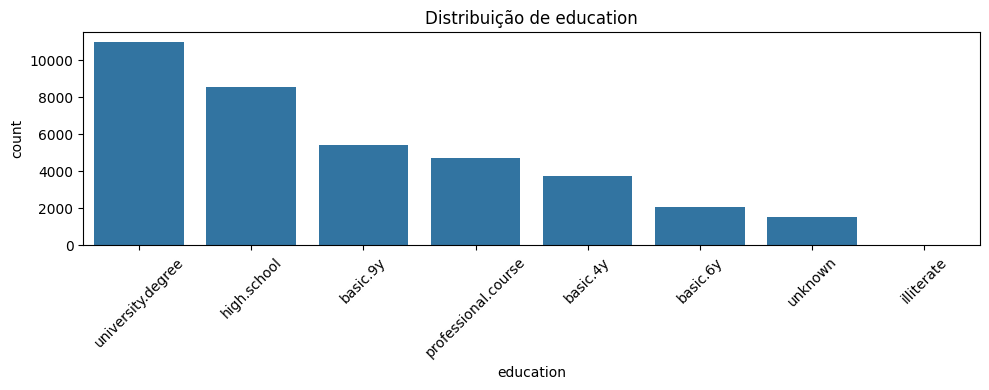

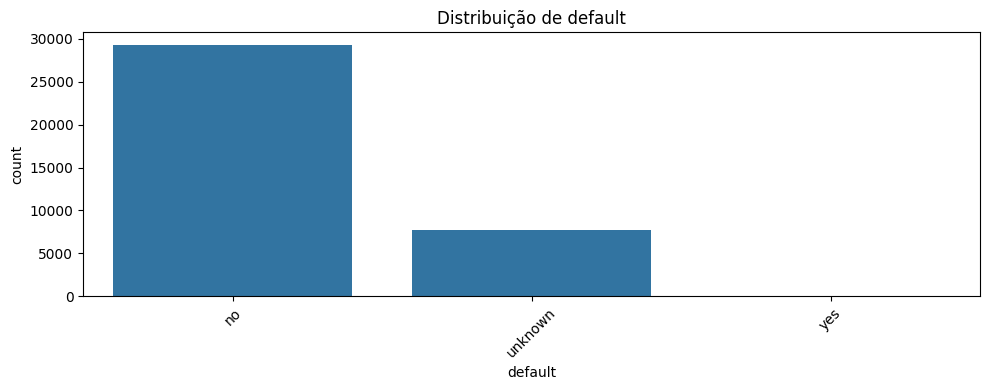

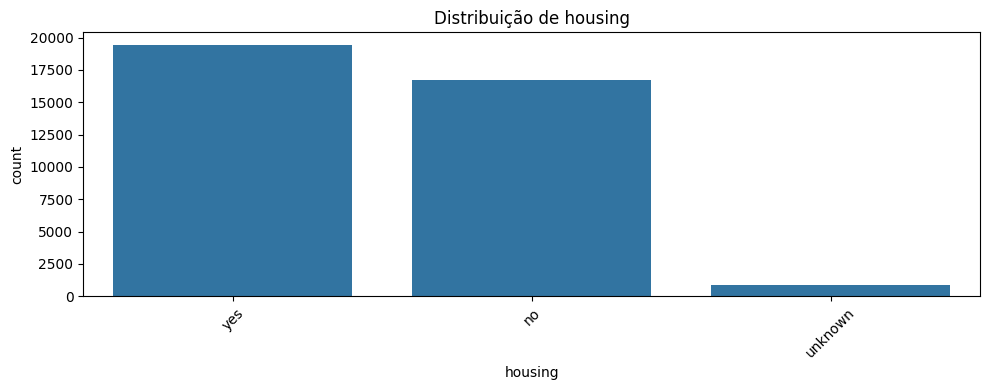

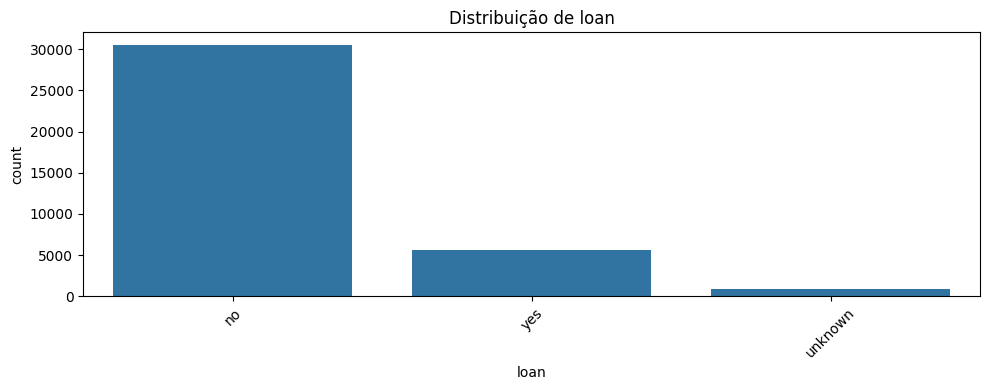

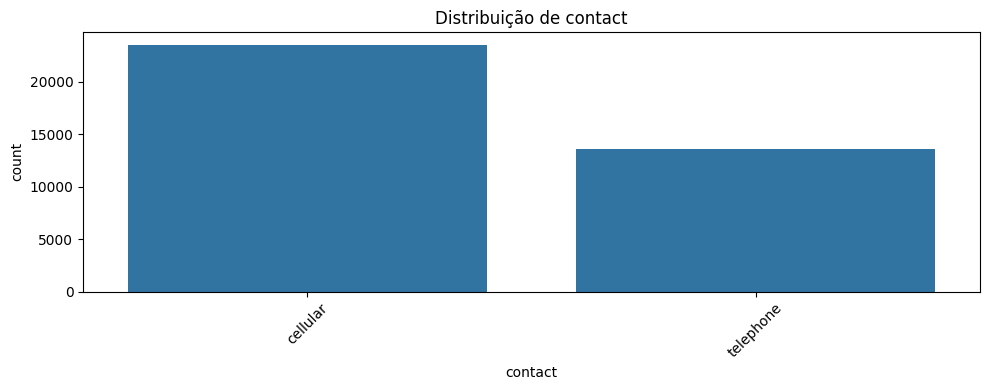

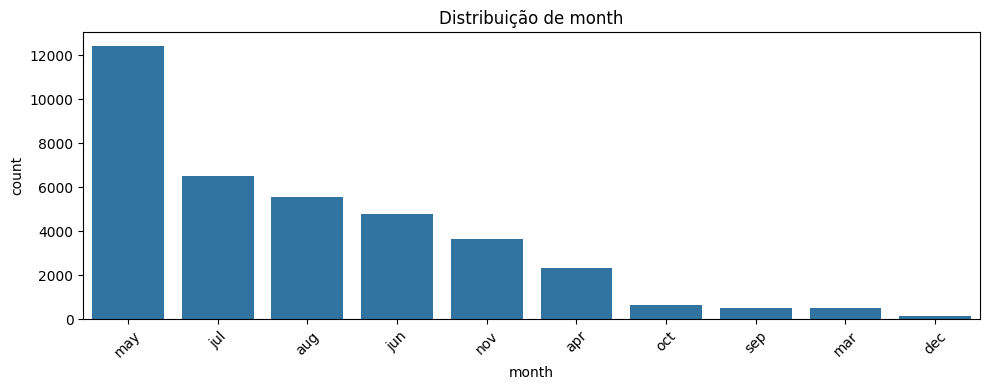

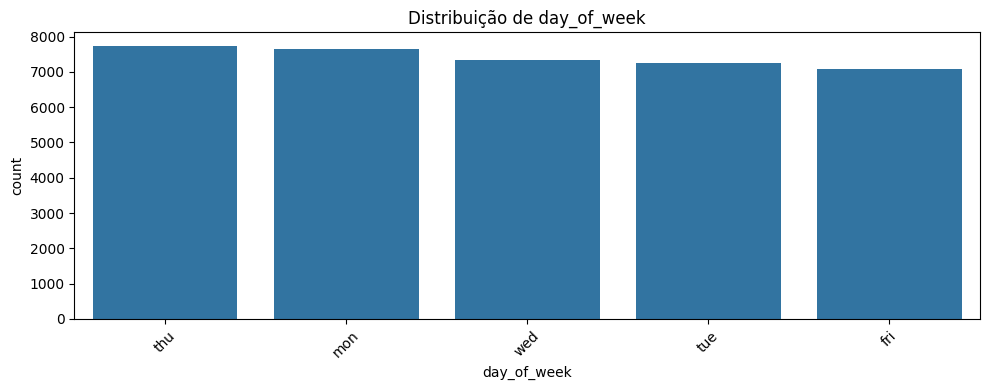

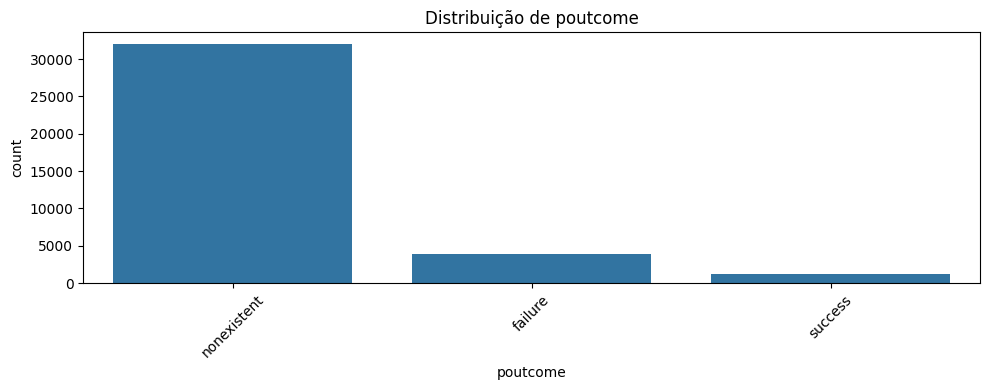

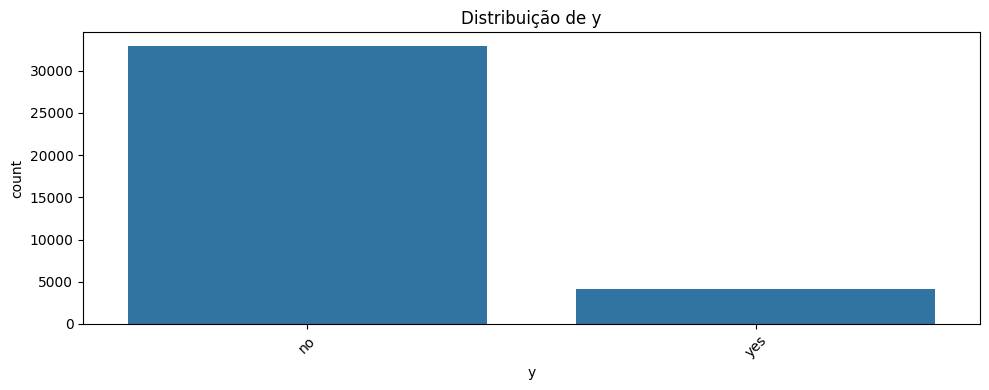

In [38]:
#análise univariada variáveis categóricas
for col in categorical_attributes.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=train_df, x=col, order=train_df[col].value_counts().index)
    plt.title(f'Distribuição de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Conclusões Análise Univariada:

1. Situação: Variável "default" tem valores apenas em uma classe, ou seja, pouco explicativa. Ação: Remover variável "default".


2. Situação: Variável "poutcome" tem vários clientes que já aceitaram oferta anteriormente. Ação: Criar uma variável "aceite_oferta", -1 falha, 0 inexistente e 1 aceite anterior. 

3. Situação: Variável "poutcome" aparentemente é a mesma variável de saída(y), pois tem relação com aceite anterior, mas observando o dataset quem tinha success estava com y=no em alguns casos. Ação: Vamos supor que essa variável é de um aceite que não o derivado para variável "y".

## Análise Bivariada

In [39]:
num_attributes.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

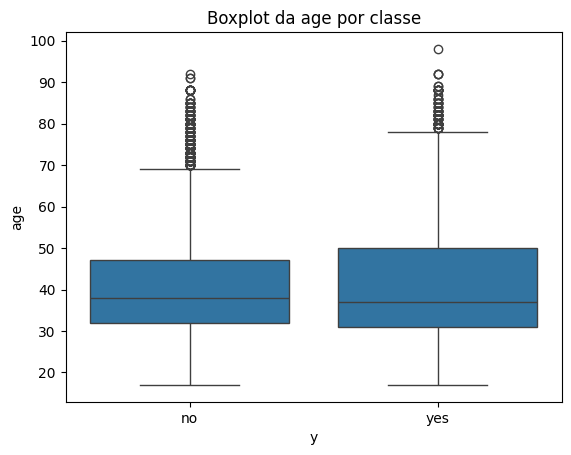

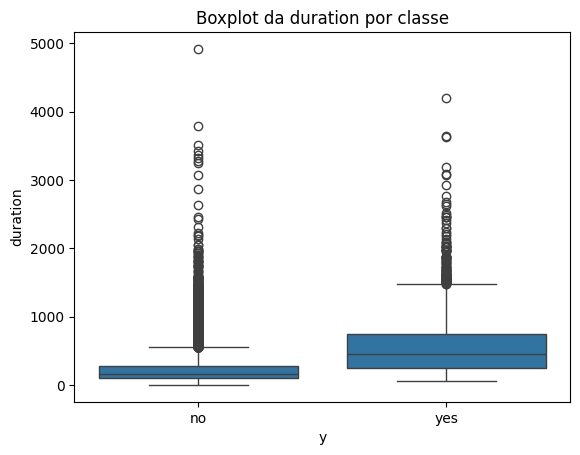

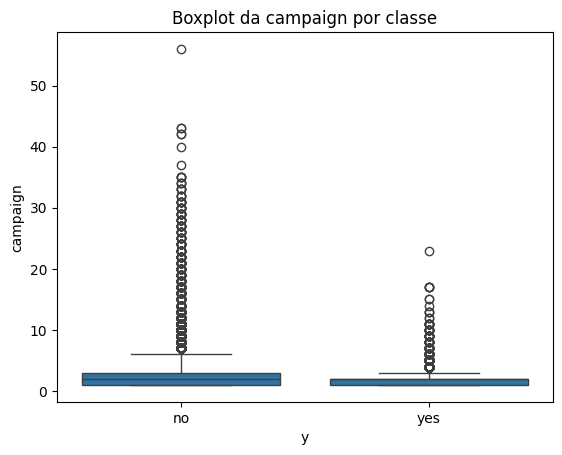

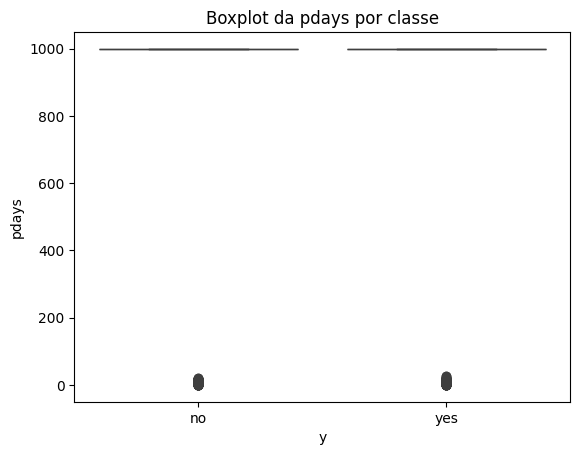

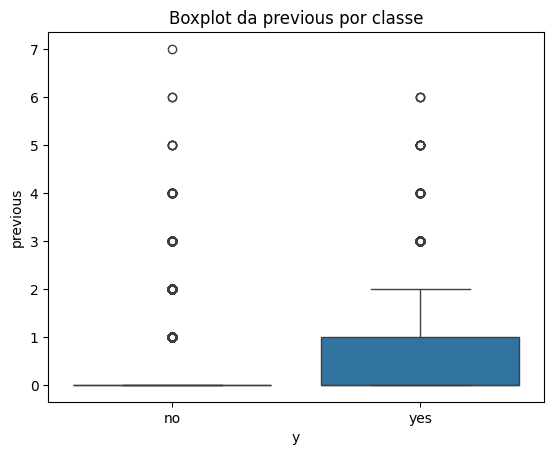

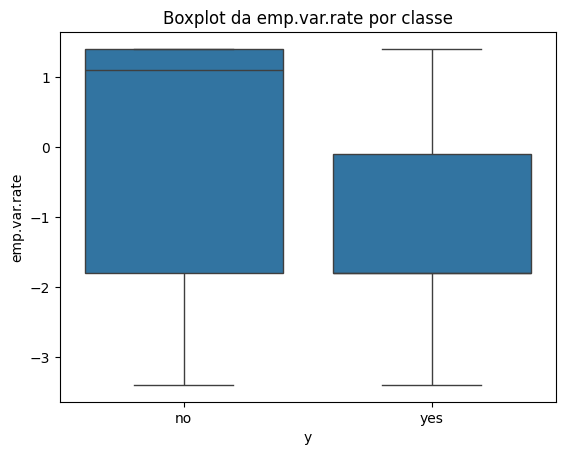

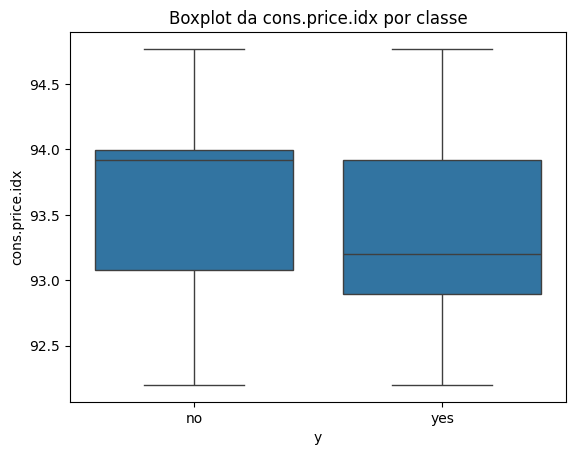

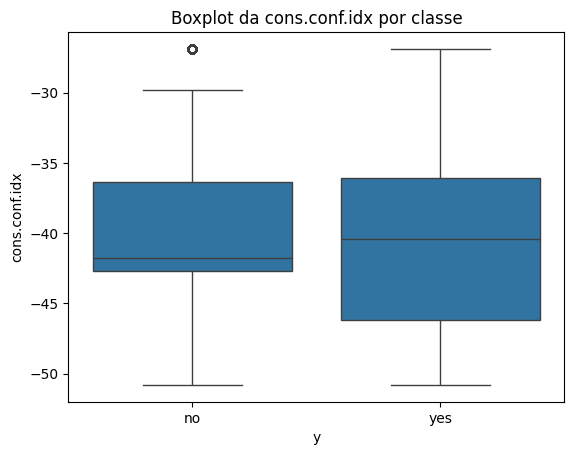

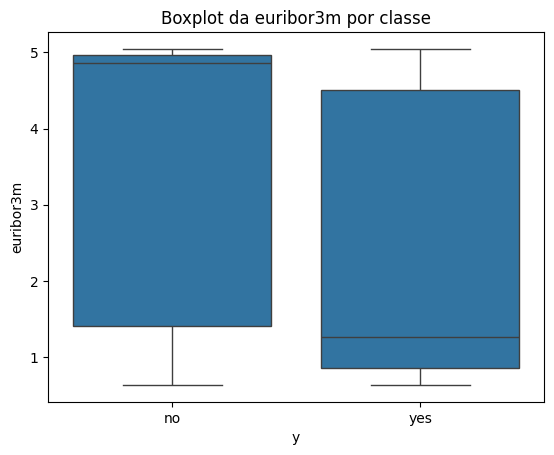

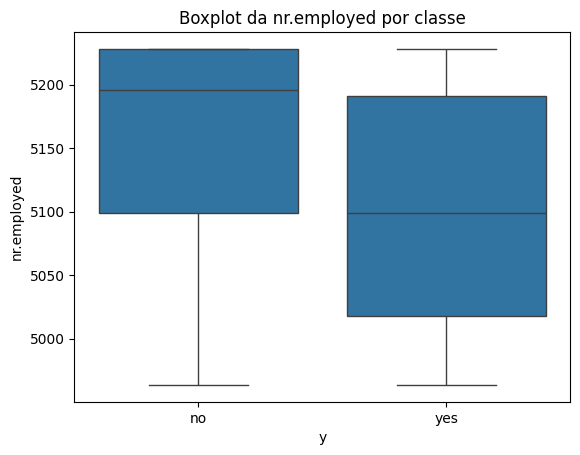

In [40]:
# Relação das variáveis numéricas com aceite de oferta.
for col in num_attributes.columns:
    sns.boxplot(x='y', y=f'{col}', data=train_df)
    plt.title(f'Boxplot da {col} por classe')
    plt.show()

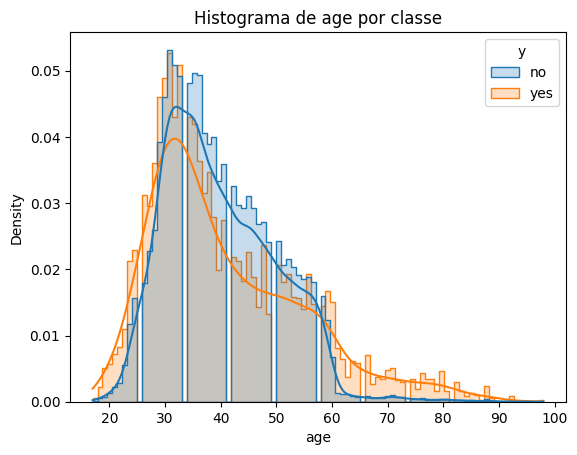

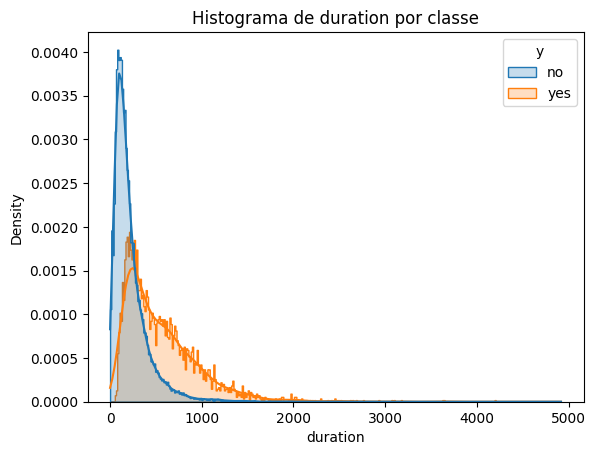

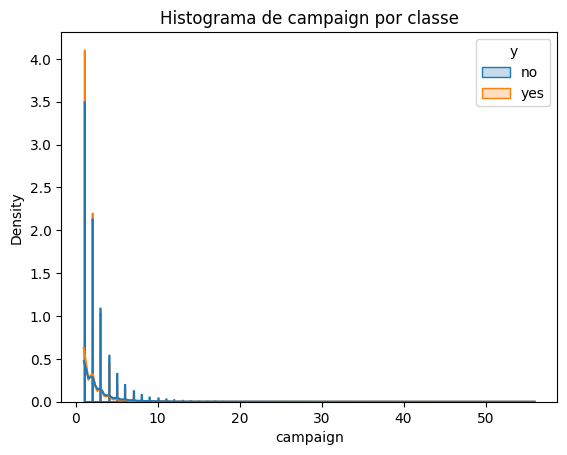

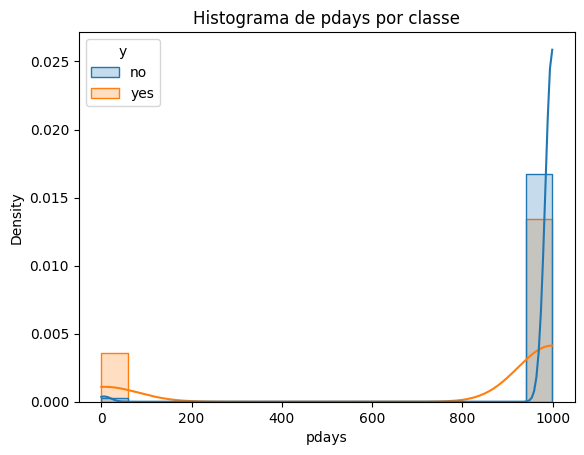

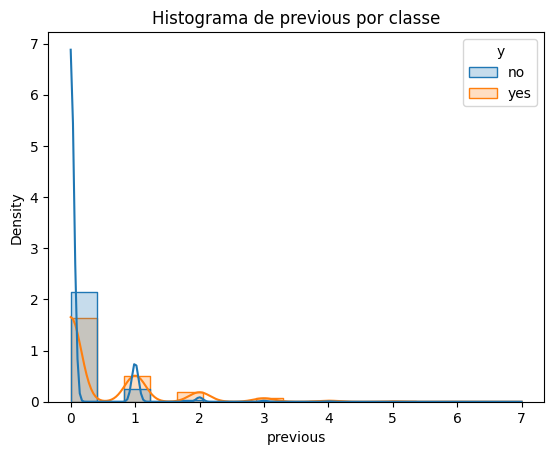

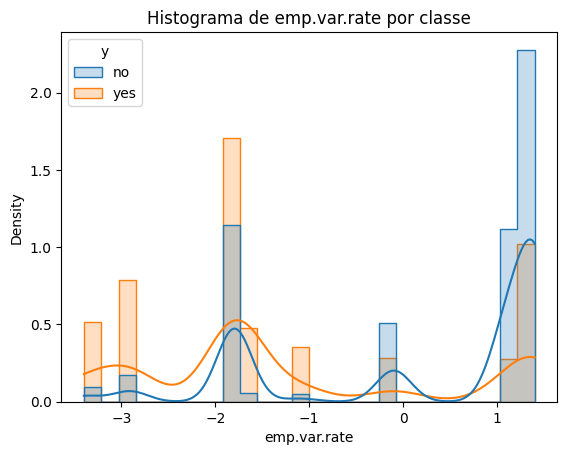

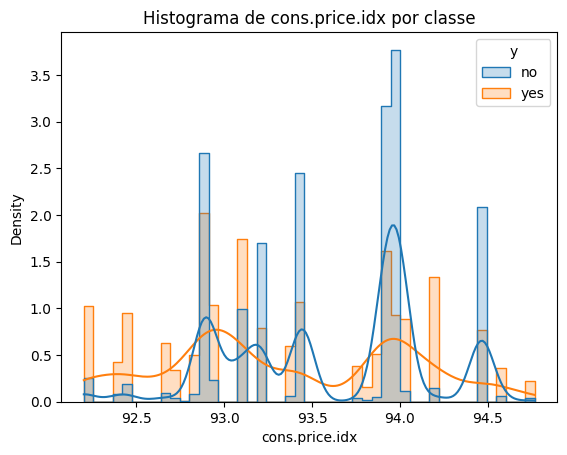

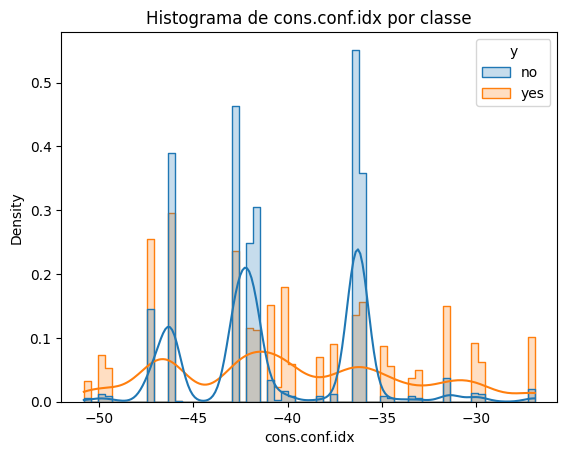

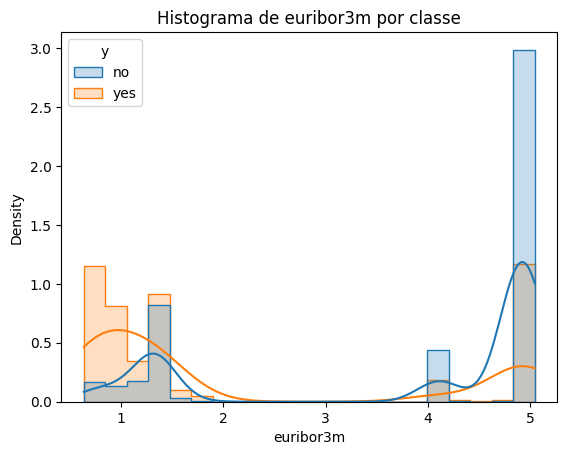

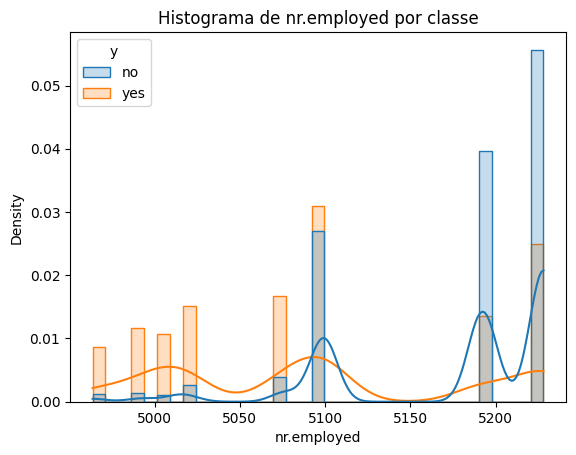

In [41]:
for col in num_attributes.columns:
    sns.histplot(data=train_df, x=col, hue='y', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Histograma de {col} por classe')
    plt.show()

In [42]:
categorical_attributes.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

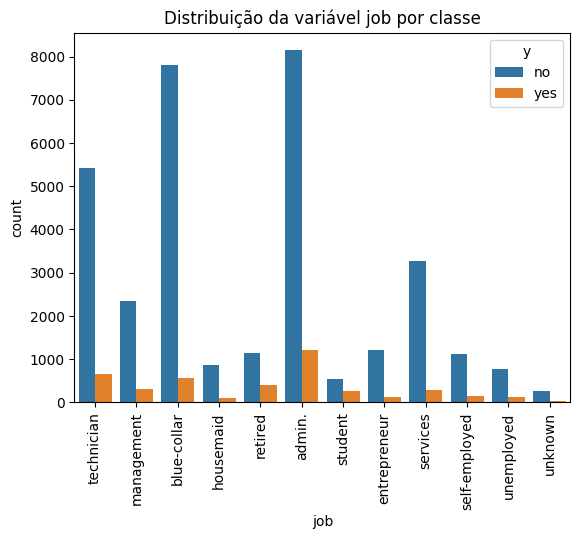

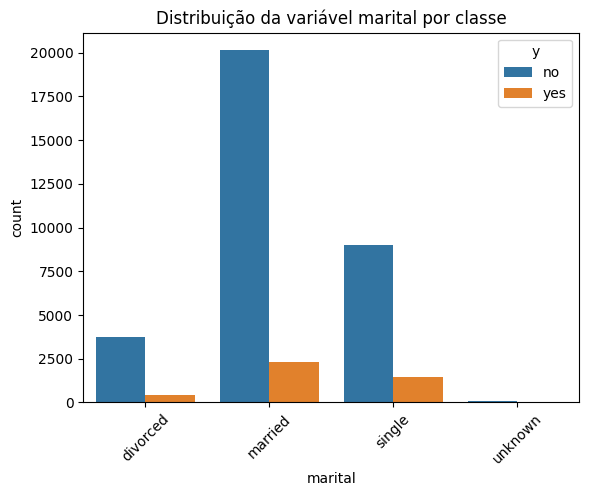

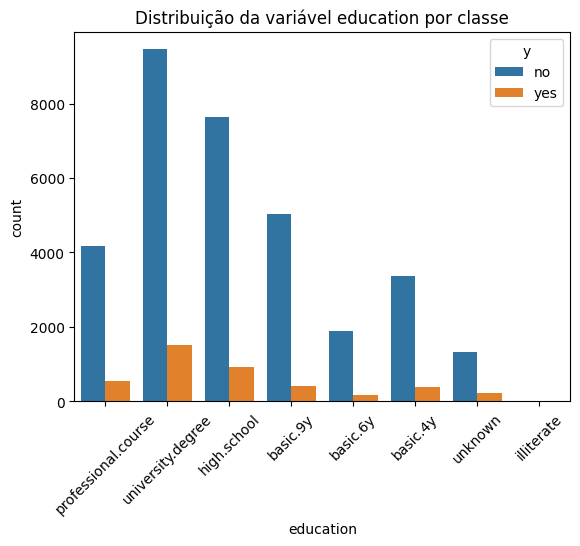

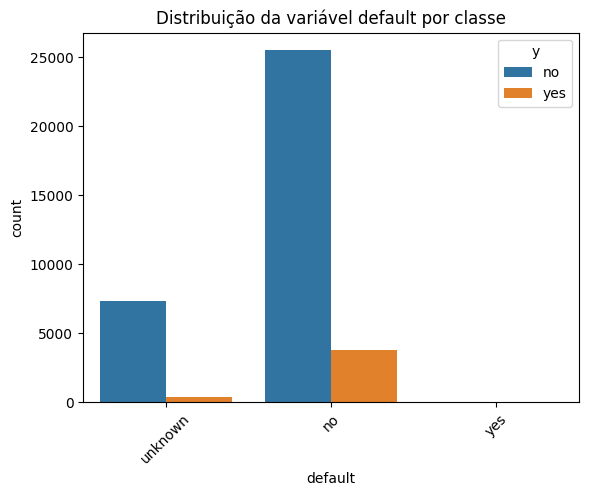

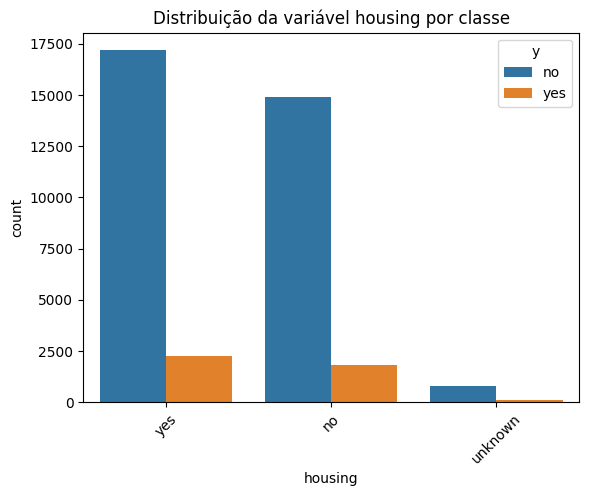

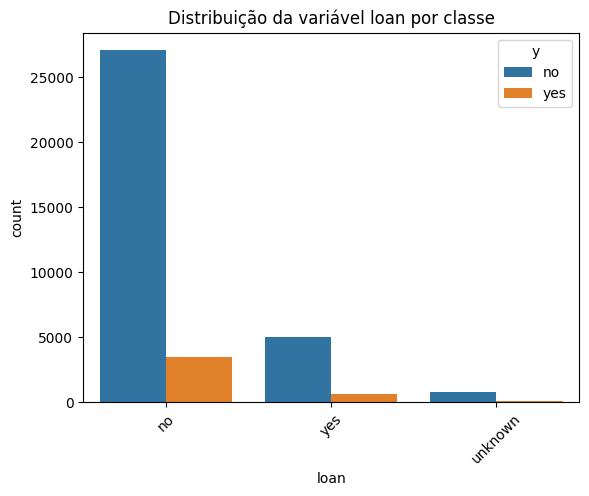

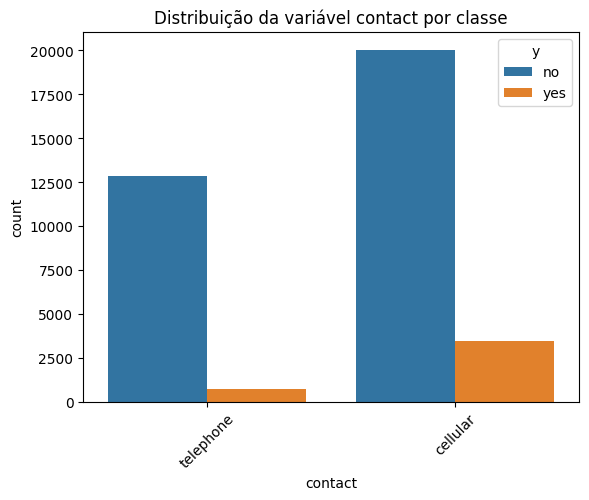

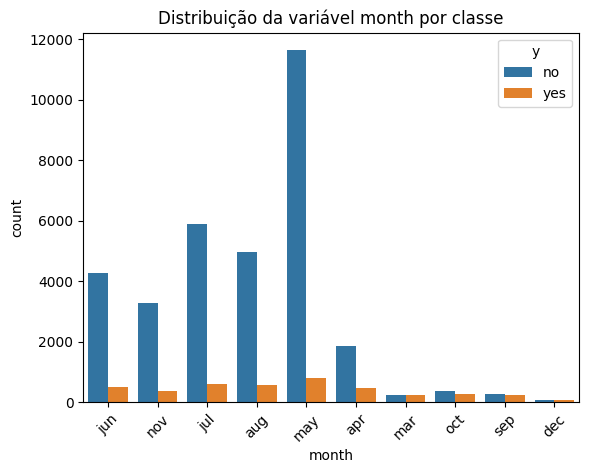

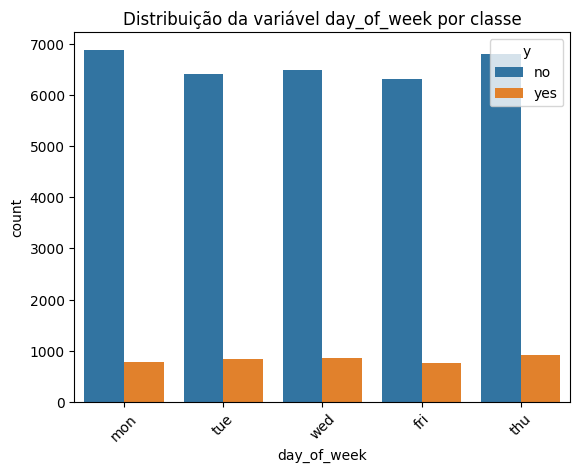

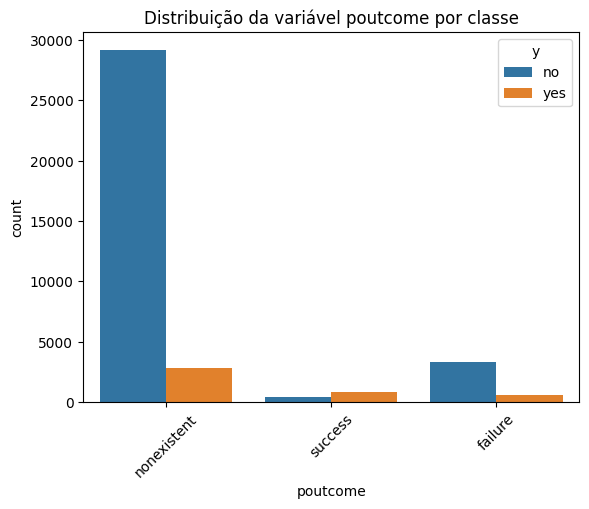

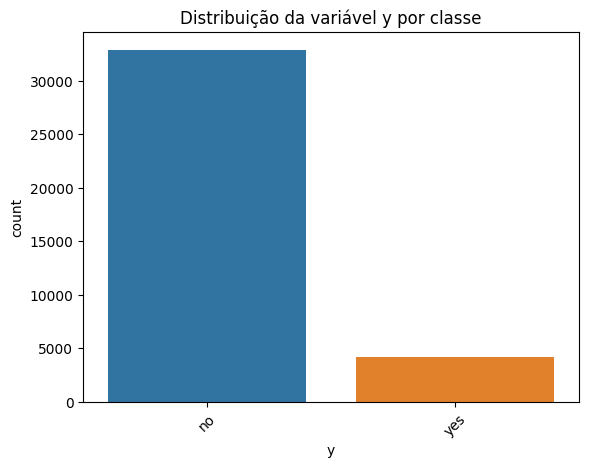

In [43]:
for col in categorical_attributes.columns:    
    sns.countplot(data=train_df,x=f'{col}',hue='y')
    if col == 'job':
        plt.title(f'Distribuição da variável {col} por classe')
        plt.xticks(rotation=90)
        plt.show()
    else: 
        plt.title(f'Distribuição da variável {col} por classe')
        plt.xticks(rotation=45)
        plt.show()


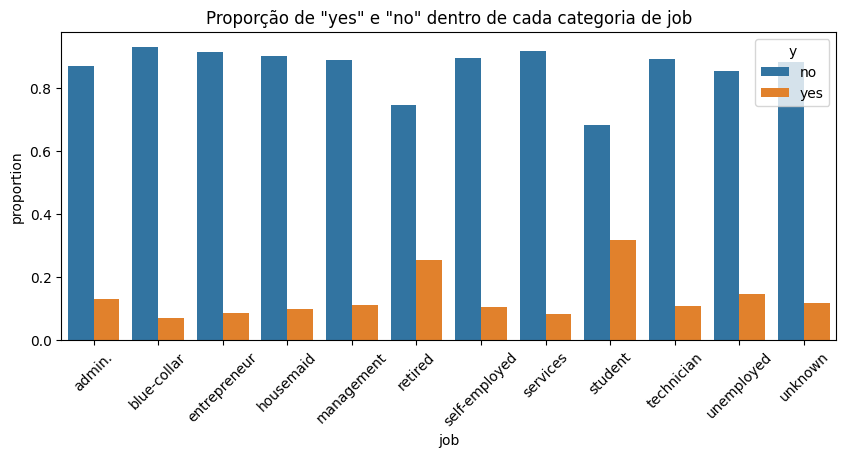

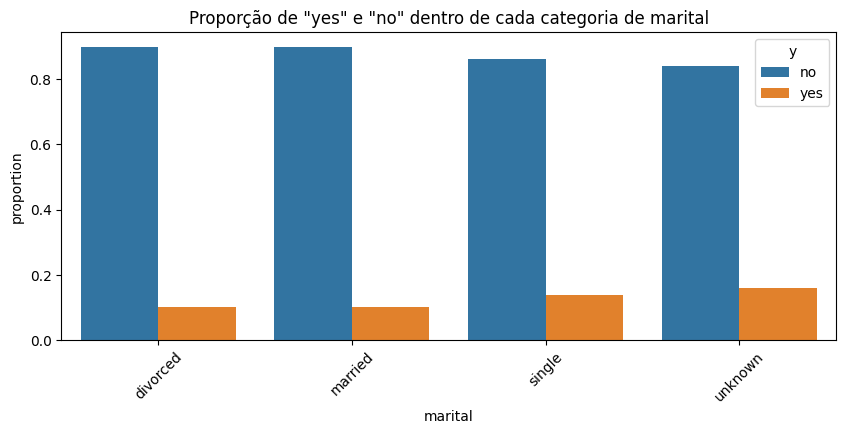

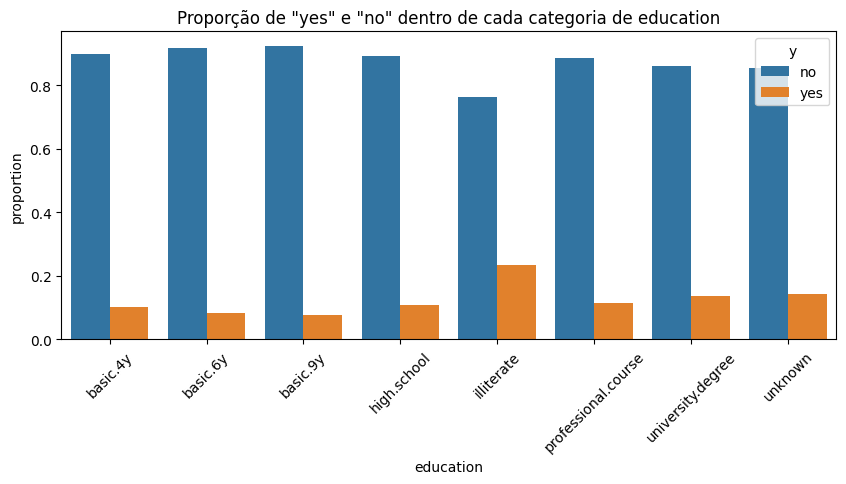

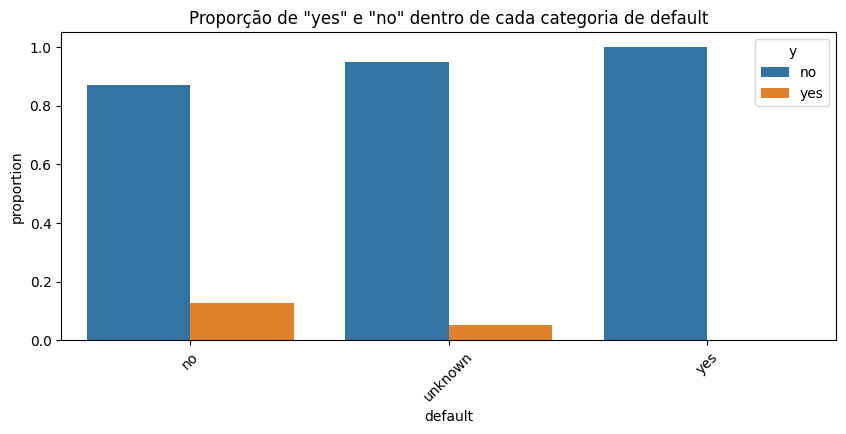

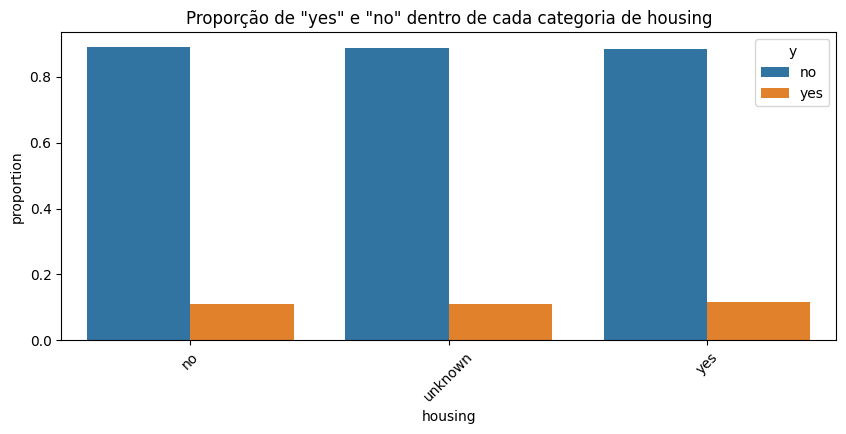

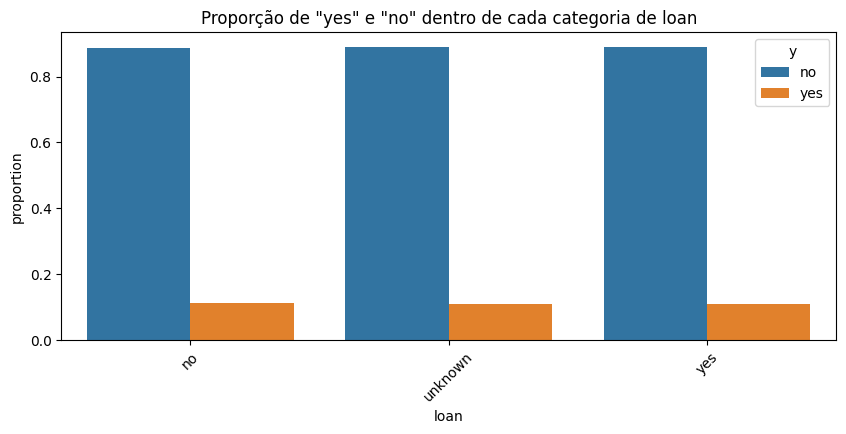

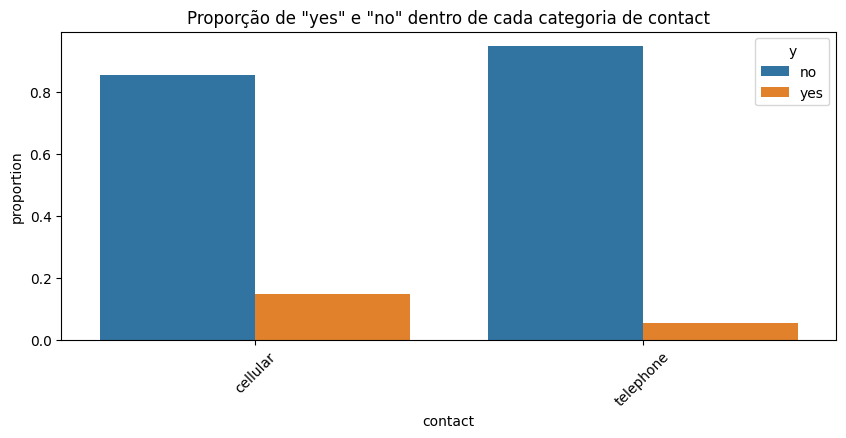

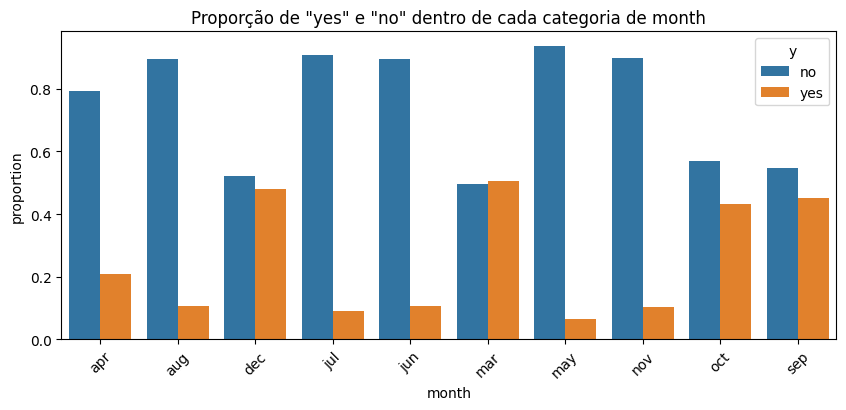

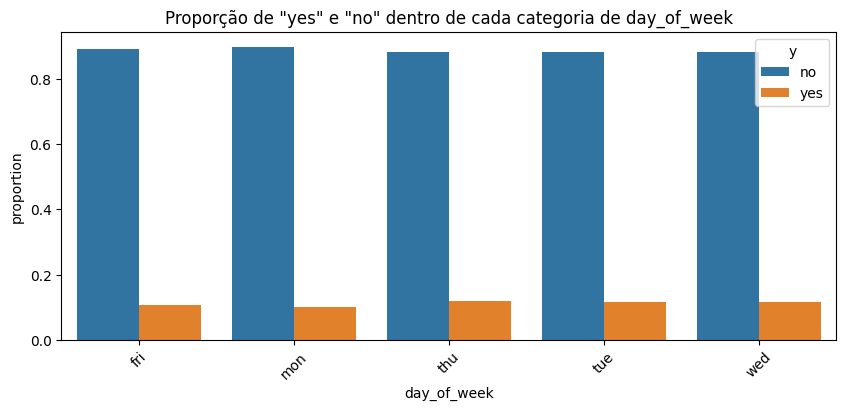

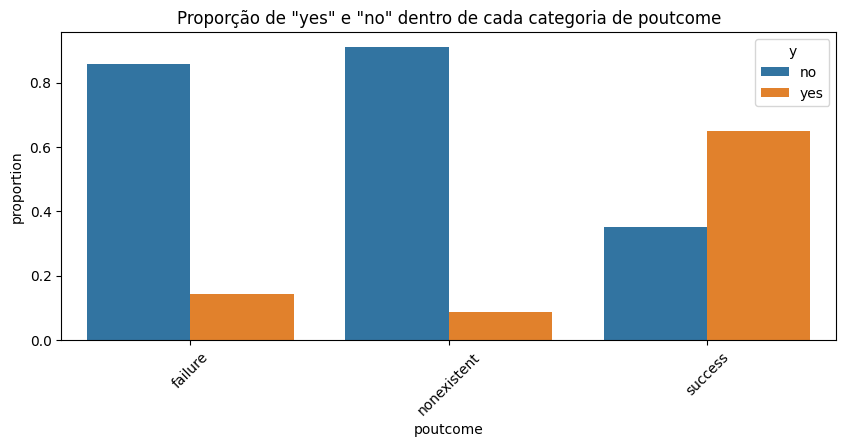

In [44]:
for col in categorical_attributes.columns:
    if col == 'y':
        break
    prop_df = train_df.groupby([col, 'y']).size().reset_index(name='count')
    total_per_group = prop_df.groupby(col)['count'].transform('sum')
    prop_df['proportion'] = prop_df['count'] / total_per_group

    plt.figure(figsize=(10, 4))
    sns.barplot(data=prop_df, x=col, y='proportion', hue='y')
    plt.title(f'Proporção de "yes" e "no" dentro de cada categoria de {col}')
    plt.xticks(rotation=45)
    plt.show()

Conclusões Bivariada: 

1. Situação: "day_of_week" não se apresenta como uma variável explicativa, observando o gráfico de proporções conseguimos perceber que as proporções praticamente se mantém ao longo da semana. Ação: remover day o week.

## Análise Multivariada

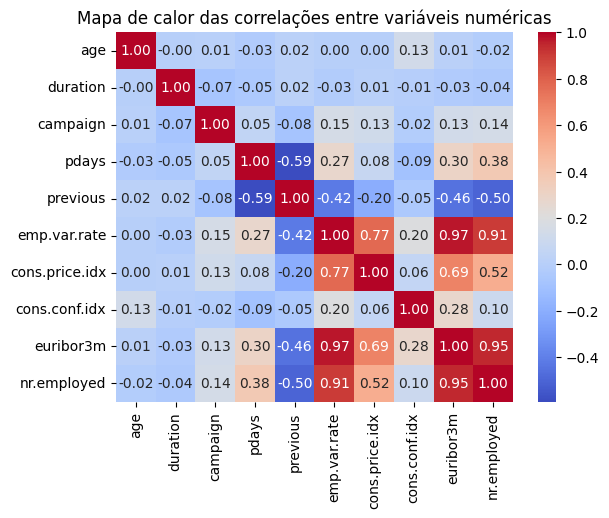

In [45]:
corr = train_df[num_attributes.columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor das correlações entre variáveis numéricas')
plt.show()


In [46]:
# Vamos substituir 'unknown' por NaN
train_df.replace('unknown', np.nan, inplace=True)

# Vamos verificar quantos valores faltantes temos por coluna
missing_counts = train_df.isnull().sum()
missing_counts_percent = train_df.isnull().sum()/len(train_df)
print(missing_counts[missing_counts > 0])
print(missing_counts_percent[missing_counts_percent>0])


job           296
marital        69
education    1564
default      7773
housing       893
loan          893
dtype: int64
job          0.007985
marital      0.001861
education    0.042192
default      0.209690
housing      0.024090
loan         0.024090
dtype: float64


-> Se poucos valores ausentes: podemos imputar com a moda.
     Para variável job, marital, education, housing e loan. 

-> Se muitos valores ausentes: podemos criar uma nova categoria ("desconhecido") ou excluir a variável.
     Para variável default que tem 20% do dataset como desconhecido, vamos

Conclusões da análise exploratória: 

Não existe nenhum variável que se mostre explicativa para modelar o problema de aceitar o produto de crédito do Meli, mas seguiremos as etapas seguintes com intuito de entender se os algoritmos conseguem obter algum tipo de separação dos dados.

# Filtragem de Variáveis

Vamos filtrar as variáveis duration e default.

In [47]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [48]:
columns_after_filter = ['age', 'job', 'marital', 'education', 'housing', 'loan',
       'contact', 'month', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

In [49]:
train_df_after_filter = train_df[columns_after_filter].copy()

# Engenharia de Atributos

No primeiro momento não construímos nenhum atributo novo, apenas utiilizamos os atributos oferecidos nos dados iniciais.

# Preparação dos Dados

In [50]:
train_df_after_filter

,age,job,marital,education,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
8061,52,technician,divorced,professional.course,yes,no,telephone,jun,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
25300,36,management,married,university.degree,yes,no,cellular,nov,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
17667,53,blue-collar,married,high.school,yes,yes,cellular,jul,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
37400,45,blue-collar,single,basic.9y,yes,no,cellular,aug,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no
4629,60,housemaid,married,high.school,yes,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40205,28,services,single,high.school,yes,no,cellular,jul,1,999,0,nonexistent,-1.7,94.215,-40.3,0.876,4991.6,no
27316,52,technician,married,professional.course,yes,no,cellular,nov,1,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,no
14392,54,admin.,married,basic.9y,no,yes,cellular,jul,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
7494,29,admin.,married,university.degree,no,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no


In [51]:
df = train_df_after_filter.copy()

if 'duration' in df.columns:
    df.drop(columns=['duration'], inplace=True)

df.replace('unknown', np.nan, inplace=True)

categorical_cols = ['job', 'marital', 'education',
                    'housing', 'loan', 'contact', 'poutcome']

month_map = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
             'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}

df['month'] = df['month'].map(month_map)

df['was_previously_contacted'] = (df['pdays'] != 999).astype(int)

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df['y'] = df['y'].map({'no': 0, 'yes': 1})

X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Treino (antes SMOTE):", y_train.value_counts(normalize=True))
print("Treino (após SMOTE):", y_train_resampled.value_counts(normalize=True))
print("Teste:", y_test.value_counts(normalize=True))


Treino (antes SMOTE): y
0    0.887352
1    0.112648
Name: proportion, dtype: float64
Treino (após SMOTE): y
0    0.5
1    0.5
Name: proportion, dtype: float64
Teste: y
0    0.88733
1    0.11267
Name: proportion, dtype: float64


# Modelagem sem Seleção de Features(Apenas Filtragem)

In [52]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # pip install xgboost

from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, roc_auc_score

In [53]:
scoring = {
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': 'roc_auc'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [62]:
lr = LogisticRegression(class_weight='balanced', random_state=42)
lr_scores = cross_validate(lr, X, y, cv=cv, scoring=scoring)

/home/erickfog/ApplicationJobs/MercadoLivre/MercadoLivre_Case/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/erickfog/ApplicationJobs/MercadoLivre/MercadoLivre_Case/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

In [63]:
print("=== Logistic Regression ===")
for metric in scoring:
    print(f"{metric}: {np.mean(lr_scores[f'test_{metric}']):.3f}")

=== Logistic Regression ===
f1: 0.383
precision: 0.267
recall: 0.678
roc_auc: 0.769


In [56]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_scores = cross_validate(rf, X, y, cv=cv, scoring=scoring)

In [57]:
print("\n=== Random Forest ===")
for metric in scoring:
    print(f"{metric}: {np.mean(rf_scores[f'test_{metric}']):.3f}")


=== Random Forest ===
f1: 0.369
precision: 0.527
recall: 0.284
roc_auc: 0.767


In [60]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_scores = cross_validate(xgb, X, y, cv=cv, scoring=scoring)

In [61]:
print("\n=== XGBoost ===")
for metric in scoring:
    print(f"{metric}: {np.mean(xgb_scores[f'test_{metric}']):.3f}")


=== XGBoost ===
f1: 0.378
precision: 0.590
recall: 0.278
roc_auc: 0.786


# Seleção de Atributos

In [64]:
# Usar o modelo base (já balanceado)
rf_boruta = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42)

# Criar seletor Boruta
boruta_selector = BorutaPy(
    estimator=rf_boruta,
    n_estimators='auto',
    verbose=2,
    random_state=42
)

# Ajustar no conjunto completo
boruta_selector.fit(X.values, y.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	34
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	30
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	30
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	30
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	30
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	30
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	30
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	30
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	1
Rejected: 	30
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	31



BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=28, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7A679F7C6F40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7A679F7C6F40, verbose=2)

In [67]:
# Listar as colunas que foram selecionadas como relevantes
selected_features = X.columns[boruta_selector.support_].tolist()
tentative_features = X.columns[boruta_selector.support_weak_].tolist()

print(f"✅ Features confirmadas ({len(selected_features)}):\n", selected_features)
print(f"🤔 Features tentativas:\n", tentative_features)

✅ Features confirmadas (3):
 ['age', 'euribor3m', 'nr.employed']
🤔 Features tentativas:
 []


# Modelagem com Seleção de Atributos

In [68]:
X_selected = X[selected_features]

# Refazer validação cruzada com as features selecionadas
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
scores = cross_validate(rf, X_selected, y, cv=cv, scoring=scoring)

print("=== Random Forest com features do Boruta ===")
for metric in scoring:
    print(f"{metric}: {np.mean(scores[f'test_{metric}']):.3f}")

=== Random Forest com features do Boruta ===
f1: 0.345
precision: 0.301
recall: 0.405
roc_auc: 0.671


# Modelagem com Balanceamento de Classes

In [69]:
X_selected_resampled = X_train_resampled[selected_features]

# Refazer validação cruzada com as features selecionadas
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
scores = cross_validate(rf, X_selected_resampled, y_train_resampled, cv=cv, scoring=scoring)

print("=== Random Forest com features do Boruta ===")
for metric in scoring:
    print(f"{metric}: {np.mean(scores[f'test_{metric}']):.3f}")

=== Random Forest com features do Boruta ===
f1: 0.910
precision: 0.937
recall: 0.884
roc_auc: 0.956


# Validação

In [82]:
def preprocessar_novos_dados(df):

    if 'duration' in df.columns:
        df.drop(columns=['duration'], inplace=True)

    df.replace('unknown', np.nan, inplace=True)

    categorical_cols = ['job', 'marital', 'education',
                        'housing', 'loan', 'contact', 'poutcome']

    month_map = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
                'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}

    df['month'] = df['month'].map(month_map)

    df['was_previously_contacted'] = (df['pdays'] != 999).astype(int)

    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    return df


In [91]:
modelo=rf.fit(X_selected_resampled,y_train_resampled)

In [97]:
# Processar os dados novos
X_novo = preprocessar_novos_dados(test_df[columns_after_filter])

# Se tiver o target real nos dados novos:
y_true = test_df['y'].map({'no': 0, 'yes': 1})

# Prever
y_pred = modelo.predict(X_novo[selected_features])
y_proba = modelo.predict_proba(X_novo[selected_features])[:, 1]

/tmp/ipykernel_656823/2628834055.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('unknown', np.nan, inplace=True)
/tmp/ipykernel_656823/2628834055.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['month'].map(month_map)
/tmp/ipykernel_656823/2628834055.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [98]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:\n", classification_report(y_true, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_true, y_pred))
print("ROC AUC Score:", roc_auc_score(y_true, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      3655
           1       0.46      0.09      0.15       464

    accuracy                           0.89      4119
   macro avg       0.68      0.54      0.55      4119
weighted avg       0.85      0.89      0.85      4119

Matriz de Confusão:
 [[3606   49]
 [ 422   42]]
ROC AUC Score: 0.5430589296664937


# Ajuste de Hyper parâmetros

Não faremos ajustes de hiperparâmetros, mas teriamos três estratégias principais aqui, são elas: random search, baysian opmzation search e grid search.

# Conclusões

Durante a análise exploratória, observamos que as variáveis disponíveis no conjunto de dados apresentavam baixo poder explicativo em relação ao comportamento de aceite da oferta de crédito por parte dos clientes. Variáveis como duration — que demonstrava maior correlação com o target — não podem ser utilizadas de forma realista na modelagem preditiva, pois seu valor só é conhecido após o término da ligação.

Apesar disso, seguimos com o processo completo de modelagem: aplicamos tratamentos nos dados, realizamos seleção de variáveis (com Boruta), balanceamento de classes (com SMOTE) e testamos diferentes algoritmos (como Random Forest, Regressão Logística e XGBoost), avaliando-os com validação cruzada estratificada e, posteriormente, com uma amostra separada para simular um cenário real de generalização.

Os modelos apresentaram boas métricas na base balanceada, porém, ao serem validados com dados completamente novos e nunca vistos, o desempenho caiu substancialmente — indicando a ocorrência de overfitting. Isso reforça a hipótese inicial de que as variáveis disponíveis não possuem informações suficientes para prever com qualidade o aceite da oferta de crédito antes da ligação.

Portanto, concluímos que, com os dados atualmente disponíveis, não é possível construir um modelo preditivo confiável para o problema proposto. Recomendamos, como próximos passos, a coleta de novas variáveis mais informativas, como comportamento transacional prévio, engajamento com outros produtos, tempo de relacionamento, entre outras, além de derivar atributos compostos que possam captar aspectos latentes do comportamento dos clientes.